# Further EDA

In [1]:
# Load in the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Set up the data
lines = pd.read_csv('../data/All-seasons.csv')

lines = lines[lines.Season != 'Season']

lines[['Season', 'Episode']] = lines[['Season', 'Episode']].astype('int64')

support_chars = ['Mr. Garrison', 'Chef', 'Kenny', 'Sharon',\
                 'Mr. Mackey', 'Gerald', 'Liane', 'Sheila',\
                 'Stephen', 'Ms. Garrison', 'Mrs. Garrison']

lines.loc[lines.Character.isin(support_chars), 'Character'] = 'Support Character'

final_labels = ['Cartman', 'Stan', 'Kyle', 'Butters', 'Randy', 'Support Character']

lines_final = lines[lines.Character.isin(final_labels)]

<b>Corpus</b>

In [5]:
import re

corpus = lines_final.Line.tolist()

for line in range(len(corpus)):
    corpus[line] = re.sub('\\n', '', corpus[line].rstrip())    

### Word Clouds

Below is a word cloud for the full data set.

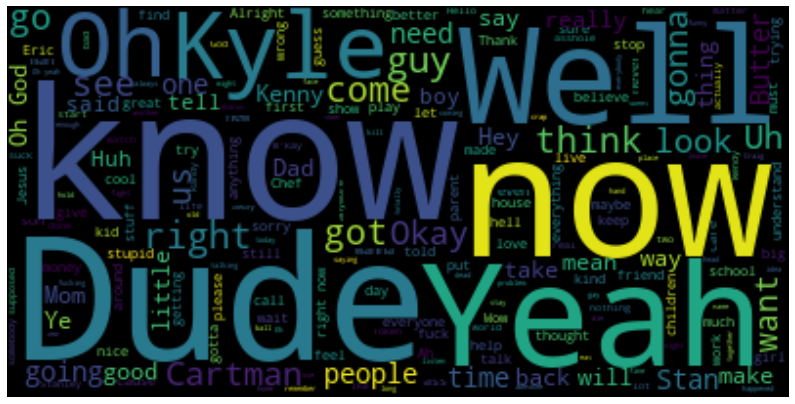

In [8]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(corpus))

fig = plt.subplots(figsize=(14,11))
_ = plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis('off')

<b>Character Word Clouds</b><br>
Now, we can create a function to generate a word cloud for a specific character.

In [14]:
def character_cloud(character):
    
    subset = lines_final[lines_final.Character == character]
    
    sub_corp = subset.Line.tolist()
    for line in range(len(sub_corp)):
        sub_corp[line] = re.sub('\\n', '', sub_corp[line].rstrip())
        
    char_cloud = WordCloud().generate(str(sub_corp))
    
    fig = plt.subplots(figsize=(10,8))
    _ = plt.imshow(char_cloud, interpolation='bilinear')
    _ = plt.axis('off')
    _ = plt.title(character, fontsize=27)

With the function defined, creating individual word clouds helps visualize which words are more commonly used by which characters.

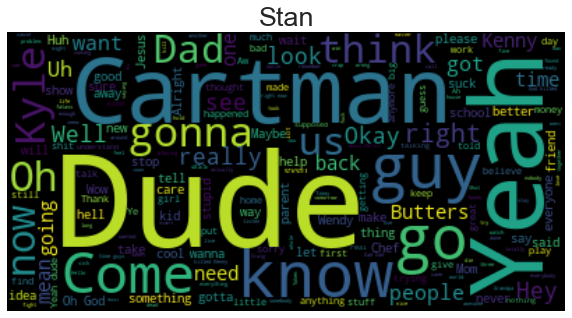

In [15]:
character_cloud('Stan')

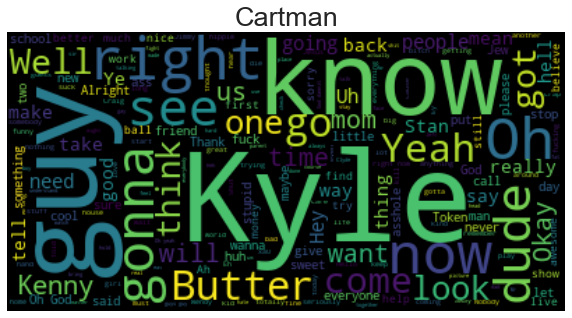

In [16]:
character_cloud('Cartman')

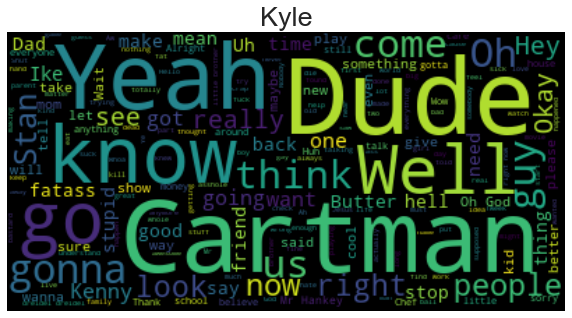

In [17]:
character_cloud('Kyle')

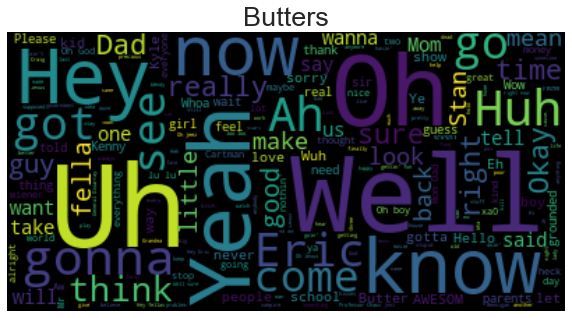

In [18]:
character_cloud('Butters')

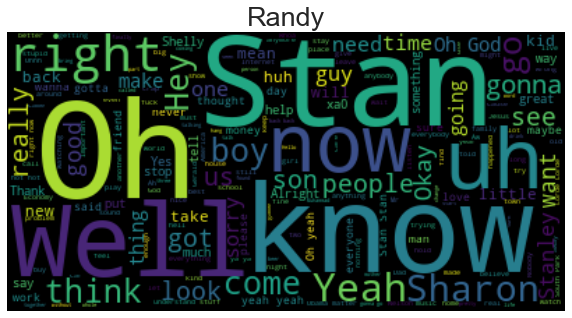

In [19]:
character_cloud('Randy')

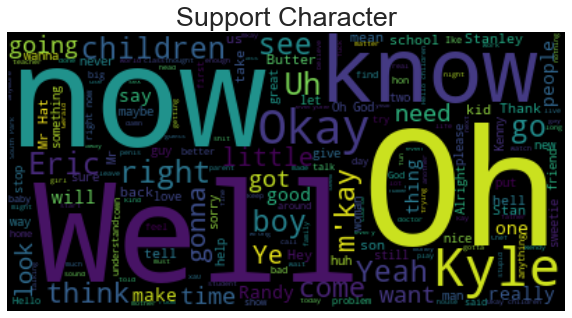

In [20]:
character_cloud('Support Character')